In [13]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr
import random

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY_D6_2

In [2]:
#Load preprocess data
D62 = np.array(pd.read_csv ('../data/processed_data/D62csv_process.csv'))
y = np.array(D62[:,-1],dtype=int)
D62 = D62[:,0:-1]

In [3]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62,y)

In [4]:
print(D62.shape, len(pred))
acc = model.score_
print(acc)

(38, 829) 38
0.8260869565217391


In [9]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.95, 0.9853479853479854, 0.8260869565217391, 0.9962962962962963, 0.17391304347826086, 0.05)


In [14]:
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIR)

[  9  14  15  16  19  22  57  61  64  70  77  93  94  96  97 103 106 121
 124 127 132 135 136 145 146 147 149 152 153 157 159 161 173 176 179 184
 185 198 206 208 223 227 240 254 255 257 260 276 294 296 300 304 314 317
 319 321 337 339 341 344 346 351 360 365 368 372 378 398 399 408 409 414
 423 424 429 431 437 445 449 460 462 464 466 486 492 495 502 504 505 507
 520 521 527 532 534 545 550 551 552 555 563 580 582 586 590 607 611 615
 621 623 639 653 657 659 670 676 682 688 700 703 708 709 711 729 737 750
 752 755 778 805] 1.0


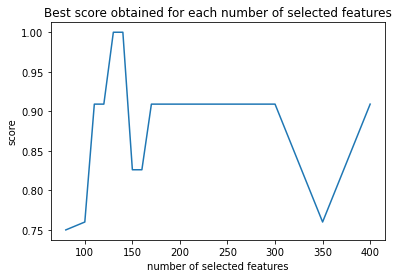

In [26]:
N = np.array([80,100,110,120,130,140,150,160,170,180,190,200,225,250,300,350,400])
best_subset, best_score = MIR(y, D62, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [27]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

130
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


[  9  11  14  15  19  22  23  57  61  64  65  69  70  93  97 106 121 124
 132 135 136 141 145 146 147 149 152 153 156 159 161 173 176 177 179 185
 198 206 208 223 227 254 255 257 260 276 294 296 304 314 317 319 321 330
 337 339 340 351 365 368 378 398 399 408 409 410 414 423 424 426 429 431
 437 445 449 460 462 464 485 486 492 495 502 504 505 507 514 517 520 521
 526 527 532 534 545 551 552 563 580 582 585 586 590 607 611 615 621 623
 624 639 649 653 657 659 670 676 682 688 700 703 708 709 711 737 750 752
 755 778 805 815] 1.0


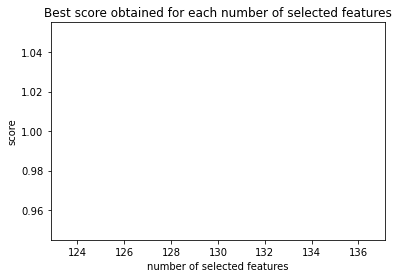

In [20]:
N = np.arange(130,131,1)
best_subset, best_score = MIR(y, D62, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [21]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

130
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)
[ 0  0 14 14 15 15  4  4  4 16 16 13 13  6  6  6 17 17  2  2 11 11  9  9
  5  5  7  7 12 12  8  8  1  1 10 10  3  3]
[ 2  2  3  3  4  4  5  5  5  6  6  7  7  9  9  9 10 10 11 11 14 14 16 16
 17 17 18 18 19 19 21 21 23 23 24 24 25 25]


# Mutual information feature selection (MIFS)


okay
[ 16  17  20  30  33  35  36  37  38  39  42  45  46  47  48  49  51  52
  53  54  57  58  59  69  71  73  74  77  79  80  81  82  84  86  87  88
  89  90  92  93  94  98  99 102 104 106 110 113 115 117 118 119 121 122
 123 127 128 129 130 132 133 136 137 138 139 141 142 143 144 145 146 150
 154 157 158 159 160 161 163 165 167 168 169 172 175 178 179 181 182 183
 184 187 188 191 192 194 195 196 197 200 202 203 204 209 211 212 216 218
 220 222 223 224 226 227 229 230 231 232 233 238 239 240 241 243 244 245
 246 247 253 254 256 257 262 263 264 267 271 272 274 278 281 288 290 293
 295 298 304 307 309 310 312 313 315 317 319 321 327 328 330 337 338 339
 340 343 344 359 361 365 367 368 370 371 373 375 380 382 384 387 388 393
 394 395 399 401 402 404 406 408 410 412 413 414 415 417 418 422 423 424
 425 426 427 428 431 432 435 436 437 438 439 441 442 448 449 450 451 452
 453 454 455 457 458 464 465 466 468 469 470 475 478 479 480 481 482 483
 486 487 490 493 494 495 496 497 501 502 504 5

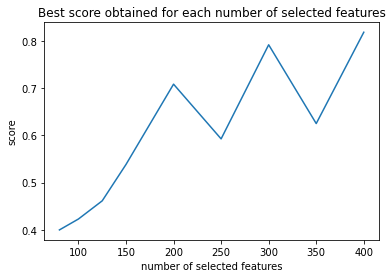

In [29]:
N = np.array([80,100,125,150,200,250,300,350,400])
best_subset, best_score = MIFS(y, D62, FamiliesClusters, compute_precision,True,N, 0.1, plot=True)
print(best_subset, best_score)

In [32]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8181818181818182, 0.9871794871794872, 0.8181818181818182, 0.9871794871794872, 0.18181818181818182, 0.18181818181818182)


# Joint Mutual Information (JMI)

okay
[ 20  26  40  41  44  57  63  95 114 119 124 147 148 151 152 153 162 166
 170 173 176 180 189 190 198 199 201 205 207 208 213 214 215 225 228 242
 248 250 251 252 259 260 261 265 268 269 270 273 275 276 277 279 280 284
 285 286 289 292 296 297 299 300 301 305 306 308 314 316 322 324 325 326
 329 331 332 333 334 335 336 342 345 350 352 353 355 356 357 358 364 366
 369 372 376 379 381 383 385 386 388 389 390 391 392 396 397 400 404 405
 407 409 411 416 419 420 421 429 430 433 434 443 445 446 449 456 459 460
 463 467 471 472 477 484 485 488 491 498 499 500 503 505 506 507 509 511
 514 518 522 526 527 530 532 533 534 537 538 539 541 549 552 555 556 558
 560 565 569 573 575 578 580 592 594 596 597 601 602 608 610 611 614 616
 620 627 635 644 646 647 651 654 655 656 658 659 660 663 665 666 667 671
 678 679 680 681 682 683 686 687 690 691 692 696 697 703 704 708 711 722
 724 725 727 733 742 748 752 756 758 759 763 766 767 768 770 773 778 782
 784 787 792 793 805 806 809 813 814 815 817 8

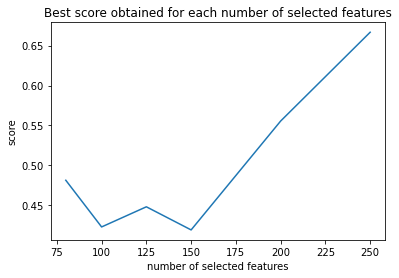

In [33]:
N = np.array([80,100,125,150,200,250])
best_subset, best_score = JMI(y, D62, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [34]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8, 0.9709090909090909, 0.6666666666666666, 0.985239852398524, 0.3333333333333333, 0.2)


# Double input symmetrical relevance (DISR)

okay
[ 48  91 111 112 114 116 117 120 123 125 126 131 135 140 147 148 152 162
 166 167 170 173 180 189 190 192 198 201 205 207 208 213 214 225 228 242
 248 250 251 259 261 265 268 269 270 273 274 275 276 277 279 280 284 285
 287 289 292 296 297 299 300 301 305 308 314 316 322 323 324 325 326 329
 331 332 333 334 335 336 342 345 350 352 353 355 356 357 358 364 369 372
 376 379 381 383 385 386 388 389 390 391 392 396 397 400 405 407 409 411
 416 419 420 421 429 430 433 443 445 446 449 456 459 460 463 467 471 472
 474 477 484 485 488 491 498 499 500 503 505 507 509 511 514 518 522 526
 527 530 532 533 534 537 538 539 541 549 552 553 555 556 558 560 562 565
 569 573 575 576 578 580 592 594 596 597 601 602 608 611 614 616 620 626
 627 635 644 646 647 649 651 654 655 656 658 659 660 665 666 671 679 680
 681 682 683 685 686 687 688 690 691 692 696 697 703 704 708 711 719 720
 722 724 725 733 739 742 748 752 756 758 759 766 767 768 770 773 778 782
 784 787 791 792 795 805 806 809 813 814 815 8

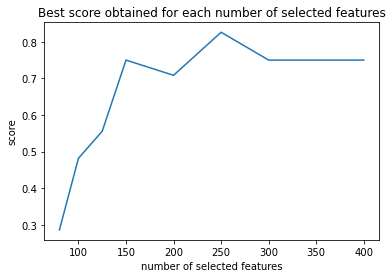

In [35]:
N = np.array([80,100,125,150,200,250,300,400])
best_subset, best_score = DISR(y, D62, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [37]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8636363636363636, 0.985239852398524, 0.8260869565217391, 0.9888888888888889, 0.17391304347826086, 0.13636363636363635)


# Fisher's score

[  0   2   4   5   6   7  10  11  12  13  14  15  16  18  23  26  28  30
  33  34  35  38  39  41  43  44  45  47  48  49  50  52  53  54  57  58
  60  61  63  64  66  67  69  71  74  76  78  84  85  86  88  90  91  95
 101 102 103 104 106 107 109 110 111 115 116 117 118 120 121 124 125 129
 131 132 133 134 135 136 140 142 143 145 146 148 150 152 153 156 159 162
 164 169 171 175 176 177 182 191 192 193 194 195 196 197 198 200 201 202
 204 206 208 210 211 212 213 214 216 218 221 223 226 230 234 235 239 240
 241 242 243 245 247 249 250 252 257 262 264 265 267 269 271 273 274 276
 282 283 285 286 288 294 296 299 301 302 308 309 310 312 313 314 318 320
 321 322 325 327 329 333 334 337 340 341 344 346 347 354 355 357 360 361
 362 365 366 371 373 375 376 378 380 381 388 391 393 395 399 400 401 402
 403 404 407 408 411 415 416 418 422 424 425 428 429 430 431 433 434 435
 436 437 439 441 442 445 448 449 459 460 463 465 467 469 472 473 474 478
 479 484 486 487 488 491 493 495 499 500 505 507 50

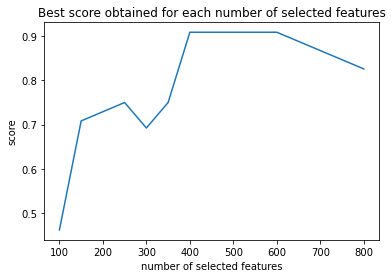

In [38]:
N = np.array([100,150,250,300,350,400,600,800])
best_subset, best_score = fishers_score(y, D62, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [39]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9927797833935018, 0.9090909090909091, 1.0, 0.09090909090909091, 0.0)


# Laplacian score

[  0   7   8  10  15  16  19  20  21  22  24  26  27  32  35  36  38  43
  45  49  50  56  61  65  69  72  73  74  75  76  77  78  79  82  87  89
  92  94  96 105 106 111 112 113 117 118 121 122 125 126 127 129 131 133
 140 141 152 154 156 157 158 159 160 164 165 173 174 177 178 179 181 182
 183 184 189 192 200 202 204 205 209 222 225 229 231 232 237 253 259 262
 265 267 271 273 276 277 284 286 294 297 299 300 301 302 304 305 306 307
 313 319 320 321 325 326 335 347 349 350 352 354 355 358 361 367 369 370
 372 373 375 376 378 381 384 385 386 388 389 392 393 395 396 397 400 402
 405 416 417 419 420 422 425 428 432 433 435 436 438 439 446 449 452 453
 454 456 466 471 472 478 482 483 484 485 486 487 490 492 493 495 497 498
 501 502 503 506 507 509 514 516 517 518 520 525 527 528 534 541 543 546
 548 549 551 552 555 561 562 563 570 571 574 577 578 579 582 583 584 585
 590 591 592 593 596 597 598 602 605 606 607 609 611 613 615 616 617 619
 624 626 629 631 632 636 638 640 643 646 653 655 65

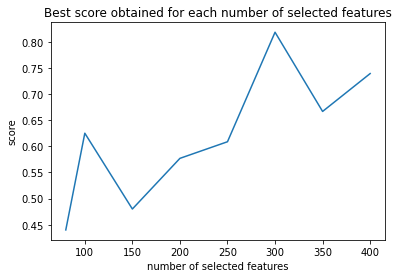

In [40]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = laplacian_score(y, D62, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [42]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

300
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8571428571428571, 0.987220447284345, 0.8181818181818182, 0.9903846153846154, 0.18181818181818182, 0.14285714285714285)


# ReliefF algorithm

[  2   6  12  13  14  16  17  20  24  25  31  33  34  40  47  48  49  51
  52  53  54  55  56  58  59  63  66  73  75  77  78  83  85  87  88  89
  92  93  94  96  98 103 104 108 110 113 114 115 116 117 119 122 123 124
 127 130 134 135 140 141 143 144 145 147 148 151 153 154 157 158 159 160
 161 166 169 171 172 179 183 185 189 190 191 193 199 200 202 211 213 215
 216 218 220 228 230 232 235 241 243 246 247 248 260 261 262 264 272 274
 280 281 289 291 292 293 296 297 299 306 308 310 311 312 316 320 322 329
 331 332 335 336 337 341 343 349 350 354 355 358 359 362 365 366 371 372
 377 378 387 391 394 397 402 404 405 407 408 410 411 415 417 420 422 423
 424 427 428 430 431 434 444 450 454 460 463 467 468 470 471 477 478 479
 485 488 507 508 509 510 512 516 517 518 521 526 527 534 540 541 542 550
 551 552 554 556 557 561 564 566 570 573 575 576 578 584 585 587 589 590
 592 593 595 596 597 598 601 602 603 609 610 612 614 617 623 625 629 631
 632 636 638 639 641 642 644 647 648 652 656 660 66

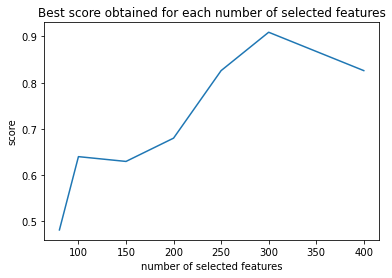

In [43]:
N = np.array([80,100,150,200,250,300,400])
best_subset, best_score = reliefF(y, D62, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [44]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

300
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9927797833935018, 0.9090909090909091, 1.0, 0.09090909090909091, 0.0)


# Fast Correlation Based Filter algorithm (FCBF)

okay
[  0   5   6   7   8  10  11  12  13  14  18  22  23  24  25  26  27  28
  32  33  34  35  38  47  49  50  52  56  57  59  63  65  67  69  70  71
  72  77  80  83  84  86  88  89  92  93  96  98  99 103 104 106 107 110
 113 118 123 125 129 130 135 136 141 145 147 148 150 152 156 158 163 168
 171 173 174 175 176 177 178 179 181 192 197 200 201 202 204 205 206 207
 214 215 216 217 218 221 222 224 226 227 228 230 232 233 235 237 240 242
 243 245 254 255 256 257 260 262 266 273 276 277 278 279 281 288 289 290
 292 293 295 298 303 307 309 312 313 318 322 324 325 328 329 330 331 333
 335 338 339 342 343 347 350 353 354 356 358 359 362 363 364 366 367 369
 373 375 377 378 379 380 381 382 383 384 385 386 387 390 393 395 396 399
 400 401 403 407 409 410 416 417 421 422 426 427 431 432 433 435 437 438
 440 441 442 445 446 448 450 451 452 455 458 460 462 466 467 468 469 470
 472 476 477 480 484 486 490 491 493 494 496 499 500 502 504 506 508 509
 510 512 513 514 516 518 520 521 523 526 528 5

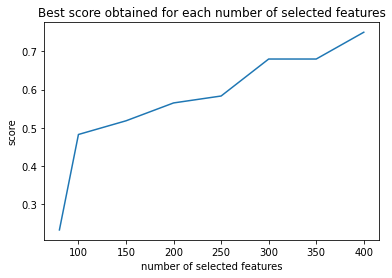

In [45]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = FCBF(y, D62, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [46]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8181818181818182, 0.978021978021978, 0.75, 0.985239852398524, 0.25, 0.18181818181818182)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/Users/theomaffei/opt/anaconda3/lib/python3.8/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 38. Number of blocks 1.9 will be approximated to 1.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[  8  10  12  13  27  28  47  49  62  73  74  77  84  85  89 101 102 103
 111 114 121 122 127 128 136 143 151 155 159 176 182 196 197 211 220 222
 244 245 249 267 275 282 283 284 294 312 336 339 341 345 363 364 367 370
 377 381 385 395 398 399 

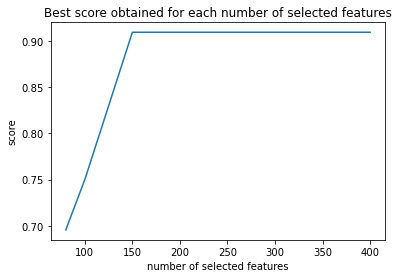

In [15]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = HsicLasso(y, D62, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [16]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

122
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9927797833935018, 0.9090909090909091, 1.0, 0.09090909090909091, 0.0)


Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/Users/theomaffei/opt/anaconda3/lib/python3.8/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 38. Number of blocks 1.9 will be approximated to 1.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M s

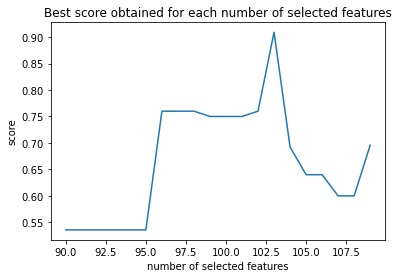

In [21]:
N = np.arange(90,110,1)
best_subset, best_score = HsicLasso(y, D62, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [22]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

103
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9927797833935018, 0.9090909090909091, 1.0, 0.09090909090909091, 0.0)


# Wrapper methods

# Stochastic optimization of features selection 

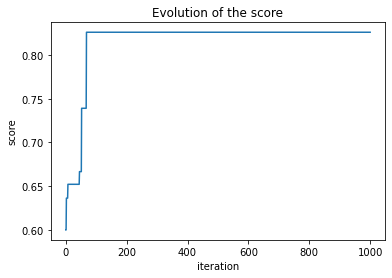

0.8260869565217391


In [10]:
best_subset, best_score  = hillclimbing(y, D62, FamiliesClusters, compute_precision,True, 1000, 0.1, True)
print(best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1449
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8636363636363636, 0.9873015873015873, 0.8260869565217391, 0.9904458598726115, 0.17391304347826086, 0.13636363636363635)


# Stimulated annealing

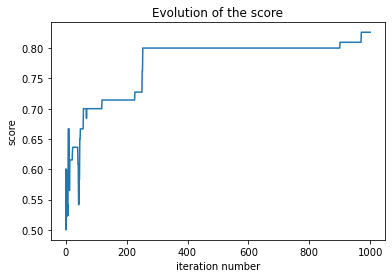

0.8260869565217391


In [12]:
best_subset, best_score  = stimulated_annealing(y, D62, FamiliesClusters, compute_precision,True, 1000, 0.1, 1, True)
print(best_score)

In [13]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1426
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8636363636363636, 0.9873015873015873, 0.8260869565217391, 0.9904458598726115, 0.17391304347826086, 0.13636363636363635)


# Backward feature selection

In [ ]:
N = np.array([80,100,150,200,250,300])
best_subset, best_score  = backward_feature_selection(y,D62, FamiliesClusters, compute_precision, True, N, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

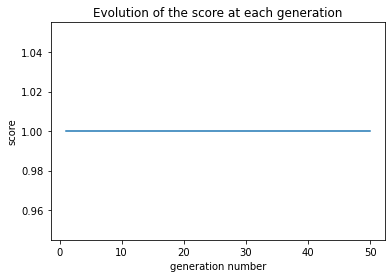

1.0


In [5]:
best_subset, best_score  = genetic_fs(y,D62,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

416
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9772727272727273, 1.0, 1.0, 0.9994946942900454, 0.0, 0.022727272727272728)


# Hybrid methods

# Mutual information and stimulated annealing

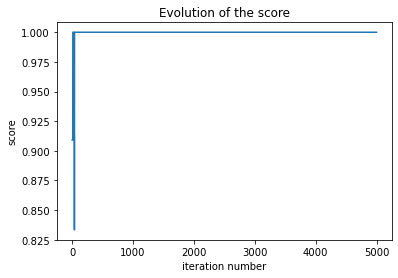

[  6   7   8  11  14  15  17  19  22  25  34  35  38  39  43  47  50  57
  62  67  69  70  72  74  76  77  81  90  93  94  99 100 102 106 107 108
 113 114 121 124 126 132 135 141 143 145 149 152 154 157 161 169 182 183
 184 191 198 199 202 206 208 209 220 223 231 233 237 243 244 249 252 254
 255 260 269 271 275 276 281 282 289 291 294 298 300 304 306 310 312 320
 323 326 330 331 334 337 338 339 343 346 352 353 360 365 370 372 373 376
 385 388 391 399 402 403 407 410 428 429 433 437 442 452 464 466 477 485
 486 492 493 495 499 502 504 507 508 509 514 517 520 524 527 529 532 534
 539 541 544 545 548 549 552 553 559 563 573 586 594 595 599 607 619 621
 624 625 632 634 648 649 650 651 653 656 657 659 660 666 674 682 686 687
 688 689 699 703 707 709 716 717 718 719 720 730 738 744 750 752 755 764
 767 770 774 782 783 785 801 805 812 813 817 822 823 825] 1.0


In [8]:
D62_best_subset, best_score = MI_stimulated_annealing(y,D62, FamiliesClusters, compute_precision,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(D62_best_subset, best_score)

In [ ]:
[  7   9  10  14  16  18  25  38  39  47  51  57  61  62  65  69  70  71
  90 100 101 102 103 107 108 112 114 121 122 124 132 135 136 147 148 149
 151 154 159 161 162 163 173 176 177 179 182 183 184 191 198 199 205 206
 209 214 223 231 233 240 243 248 249 252 254 260 263 269 271 275 287 295
 296 304 310 315 317 320 329 331 334 340 343 344 348 352 355 368 370 372
 379 382 383 384 385 391 403 404 405 407 412 414 424 431 437 439 442 449
 451 457 460 464 485 487 495 499 502 504 506 509 510 514 516 517 520 524
 526 529 536 545 550 551 552 553 563 573 575 578 587 595 607 617 619 621
 624 627 628 630 632 634 639 648 649 650 651 659 660 662 670 672 679 681
 686 689 699 700 705 707 710 716 718 720 721 724 729 737 744 750 755 764
 767 770 774 776 780 783 794 799 801 804 807 813 815 823 826 828] 

In [9]:
print(len(D62_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, D62_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

212
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


# Mutual information and genetic feature selection

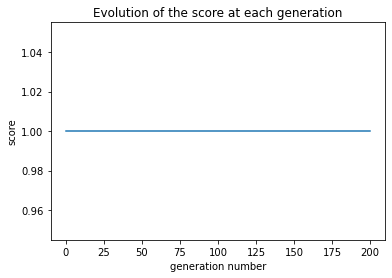

[  8   9  12  18  27  29  30  33  36  37  45  47  48  52  61  62  63  64
  67  68  71  73  74  79  81  82  84  88  90  93  94 107 111 113 123 132
 134 142 143 144 147 149 150 158 161 166 171 172 173 176 187 189 202 204
 209 229 232 233 236 239 241 243 247 249 250 256 264 267 268 269 273 286
 289 291 296 299 303 305 309 312 319 322 330 341 348 365 369 373 386 391
 396 402 405 408 416 417 420 423 430 433 434 438 439 442 451 455 465 468
 482 483 485 487 489 490 500 502 505 512 515 518 533 538 546 552 557 566
 568 578 581 589 593 594 597 598 600 606 612 615 621 623 626 628 629 634
 635 636 646 648 649 654 659 663 671 672 677 682 684 686 687 692 707 718
 724 727 735 737 738 740 744 745 755 756 757 759 761 767 768 772 775 779
 785 786 787 804 805 806 808 822 824] 1.0


In [7]:
best_subset, best_score = MI_genetic_fs(y,D62, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset, best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D62[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

188
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9927797833935018, 0.9090909090909091, 1.0, 0.09090909090909091, 0.0)


In [12]:
D62_best = get_best_genes_names(D62_best_subset, '../data/processed_data/D62genes_interest.csv' ,'../data/optimized_subsets/D62genes_best.csv')